# 彼得与狼：强化学习入门

在本教程中，我们将学习如何将强化学习应用于路径寻找问题。这个场景的灵感来源于俄罗斯作曲家[谢尔盖·普罗科菲耶夫](https://en.wikipedia.org/wiki/Sergei_Prokofiev)创作的音乐童话故事[《彼得与狼》](https://en.wikipedia.org/wiki/Peter_and_the_Wolf)。故事讲述了年轻的先锋彼得勇敢地走出家门，来到森林空地追逐一只狼。我们将训练机器学习算法，帮助彼得探索周围区域并构建一个最优导航地图。

首先，让我们导入一组有用的库：


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## 强化学习概述

**强化学习** (RL) 是一种学习技术，通过运行大量实验，让我们能够学习某个**智能体**在某个**环境**中的最优行为。在这个环境中，智能体应该有一个明确的**目标**，由**奖励函数**定义。

## 环境

为了简单起见，我们将彼得的世界设定为一个大小为 `width` x `height` 的方形棋盘。棋盘中的每个格子可以是以下几种类型：
* **地面**，彼得和其他生物可以在上面行走
* **水域**，显然无法在上面行走
* **树**或**草地** - 可以休息的地方
* **苹果**，代表彼得很乐意找到的食物以填饱肚子
* **狼**，危险的生物，应尽量避开

为了与环境交互，我们将定义一个名为 `Board` 的类。为了避免让这个笔记本过于复杂，我们已将所有与棋盘相关的代码移至单独的 `rlboard` 模块中，现在我们将导入该模块。你可以查看该模块以了解实现细节的内部工作原理。


现在让我们创建一个随机棋盘，看看它的样子：


In [4]:
# code block 1

## 行动和策略

在我们的例子中，Peter 的目标是找到一个苹果，同时避开狼和其他障碍物。将这些行动定义为一个字典，并将其映射到对应的坐标变化对。


In [5]:
# code block 2

我们代理（Peter）的策略由一个所谓的**策略**定义。让我们来看看最简单的策略，称为**随机游走**。

## 随机游走

首先，让我们通过实现随机游走策略来解决我们的问题。


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## 奖励函数

为了让我们的策略更加智能，我们需要了解哪些动作比其他动作“更好”。


In [8]:
#code block 5

## Q-Learning

构建一个 Q-表，或者说是一个多维数组。由于我们的棋盘尺寸为 `width` x `height`，我们可以通过一个形状为 `width` x `height` x `len(actions)` 的 numpy 数组来表示 Q-表：


In [9]:
# code block 6

将 Q-表传递给 `plot` 函数，以便在棋盘上可视化该表：


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Q-Learning 的核心：贝尔曼方程与学习算法

编写我们的学习算法伪代码：

* 初始化 Q-表 Q，使所有状态和动作的值相等
* 设置学习率 $\alpha\leftarrow 1$
* 多次重复模拟
   1. 从随机位置开始
   2. 重复以下步骤
        1. 在状态 $s$ 下选择一个动作 $a$
        2. 执行动作，移动到新状态 $s'$
        3. 如果遇到游戏结束条件，或者总奖励过小 - 退出模拟  
        4. 计算新状态下的奖励 $r$
        5. 根据贝尔曼方程更新 Q-函数：$Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. 更新总奖励并减少 $\alpha$。

## 利用与探索

最佳方法是在探索与利用之间找到平衡。随着我们对环境的了解加深，我们更倾向于遵循最优路径，但偶尔也需要选择未探索的路径。

## Python 实现

现在我们准备实现学习算法。在此之前，我们还需要一个函数，将 Q-表中的任意数值转换为对应动作的概率向量：


In [10]:
# code block 7

我们在原始向量中添加少量的 `eps`，以避免在初始情况下所有向量分量相同时出现除以0的情况。

我们将运行实际的学习算法进行5000次实验，也称为**训练周期**：


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

在执行此算法后，Q-表应更新为定义每个步骤中不同动作吸引力的值。在此处可视化该表：


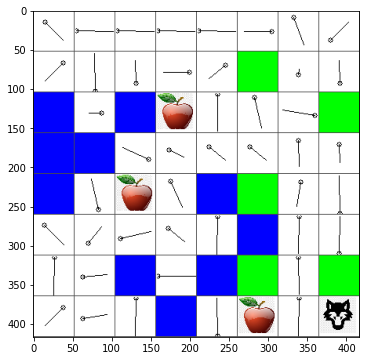

In [43]:
m.plot(Q)

## 检查策略

由于 Q-Table 列出了每个状态下每个动作的“吸引力”，我们可以很容易地利用它来定义在我们的世界中高效的导航。在最简单的情况下，我们只需选择对应于最高 Q-Table 值的动作：


In [13]:
# code block 9

2

如果你多次尝试运行上述代码，你可能会注意到有时它会“卡住”，需要按下笔记本中的停止按钮来中断运行。

> **任务 1：** 修改 `walk` 函数，限制路径的最大长度为一定步数（例如，100步），并观察上述代码是否会不时返回这个值。

> **任务 2：** 修改 `walk` 函数，使其不再回到之前已经访问过的地方。这将防止 `walk` 进入循环，但代理仍可能被“困”在一个无法逃脱的位置。


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


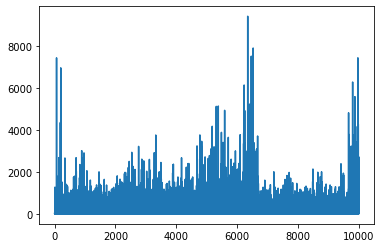

In [57]:
plt.plot(lpath)

## 练习
## 一个更真实的《彼得与狼》的世界



---

**免责声明**：  
本文档使用AI翻译服务[Co-op Translator](https://github.com/Azure/co-op-translator)进行翻译。尽管我们努力确保翻译的准确性，但请注意，自动翻译可能包含错误或不准确之处。原始语言的文档应被视为权威来源。对于关键信息，建议使用专业人工翻译。我们不对因使用此翻译而产生的任何误解或误读承担责任。
